## Abstract

This notebook explores the transactions in the pharmacy dataset from 2004 until 2022. The goal is to identify and visualize pattern so that an appropriate reinforcement learning model is choosen latter on. Some of the created visualizations will be edited in a vector program. Subsequently, they can be presented in the presentation of the project.
<br>
<br>
The data used in this notebook comes from a PostgreSQL database. Due to the enforced integrity constraints, only minor additional preprocessing steps are necessary depending on the exploration goal. If you are not yet familiar with how the data was transformed, please refer to the directory '/database'. As usual, the relational database is queried through SQL. The query results are stored in a Pandas dataframe before the visualizations are created using Matplotlib and Seaborn.

## Preperation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psycopg2 as pg
from pywaffle import Waffle
import seaborn as sns
from sqlalchemy import create_engine
import squarify

In [2]:
# Establish connection to Postgresql-database
connection = pg.connect("host=localhost dbname=pharmacy user=postgres password=projectds")

## Exploration

### Time

#### Transactions per Year

In [3]:
df_trans_year = pd.io.sql.read_sql(""" 
SELECT EXTRACT(year from transaktion.datum) AS year, count(*) AS transactions
FROM transaktion
GROUP BY EXTRACT(year from transaktion.datum)
ORDER BY EXTRACT(year from transaktion.datum) ASC;
""", connection)

display(df_trans_year)

,year,transactions
0,2004.0,159825
1,2005.0,151459
2,2006.0,146651
3,2007.0,148273
4,2008.0,148043
5,2009.0,144941
6,2010.0,140938
7,2011.0,136629
8,2012.0,133456
9,2013.0,133804


<IPython.core.display.Javascript object>


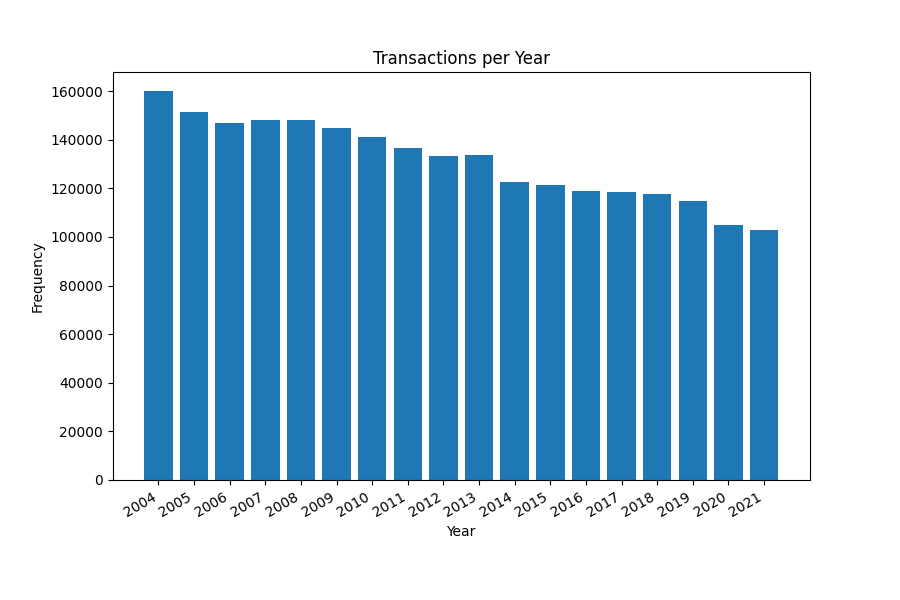

In [32]:
%matplotlib notebook

# Data
Xplot = df_trans_year['year'].astype('int32')
yplot = df_trans_year['transactions']

# Bar Blot
fig, ax = plt.subplots(figsize=(9, 6))
fig.autofmt_xdate()
plt.xlabel("Year")
plt.ylabel("Number of Transactions")
plt.bar(Xplot, yplot)
plt.xticks(Xplot)
plt.title("Transactions per Year")
plt.savefig("visualizations/transactions_year.svg")
plt.show()

The amount of annual transactions seems to decline from year to year. In order to validate, whether the pharmacy is actually loosing on business, the amount of drugs sold needs to be cross-checked. This is due to the fact, that multiple drugs can be bought in a single transaction.

In [5]:
df_amount_year = pd.io.sql.read_sql(""" 
SELECT EXTRACT(year from transaktion.datum) AS year, SUM(transaktion.anzahl) AS sales
FROM transaktion
GROUP BY EXTRACT(year from transaktion.datum)
ORDER BY EXTRACT(year from transaktion.datum) ASC;
""", connection)

display(df_amount_year)

,year,sales
0,2004.0,173590
1,2005.0,165173
2,2006.0,160546
3,2007.0,161475
4,2008.0,161672
5,2009.0,160954
6,2010.0,155899
7,2011.0,149344
8,2012.0,144597
9,2013.0,144423


Indeed: the amount of drugs sold and the frequency of transactions are highly correlated. For simplicifcation, only the frequency of transactions is used in the further course of this exploration.

#### Transactions per Month

In [6]:
df_trans_month = pd.io.sql.read_sql(""" 
SELECT EXTRACT(month from transaktion.datum) AS month, COUNT(*) AS transactions
FROM transaktion
GROUP BY EXTRACT(month from transaktion.datum)
ORDER BY EXTRACT(month from transaktion.datum) ASC;
""", connection)

display(df_trans_month)

,month,transactions
0,1.0,208443
1,2.0,203980
2,3.0,219146
3,4.0,192540
4,5.0,182658
5,6.0,176224
6,7.0,181624
7,8.0,168927
8,9.0,180006
9,10.0,200473


<IPython.core.display.Javascript object>


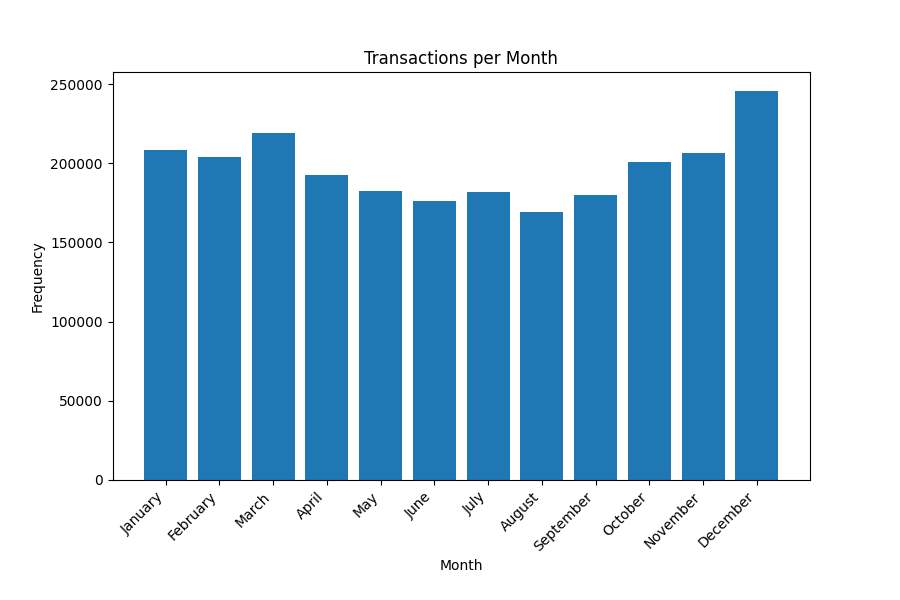

In [33]:
%matplotlib notebook

# Data
Xplot = df_trans_month['month'].astype('int32')
yplot = df_trans_month['transactions']

# Bar Blot
fig, ax = plt.subplots(figsize=(9, 6))
fig.autofmt_xdate()
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.bar(Xplot, yplot)
plt.xticks(Xplot)
ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation = 45)
plt.title("Transactions per Month")
plt.savefig("visualizations/transactions_month.svg")
plt.show()

#### Transactions per Weekday

In [8]:
df_trans_day = pd.io.sql.read_sql(""" 
SELECT EXTRACT(dow from transaktion.datum) AS weekday, COUNT(*) AS transactions
FROM transaktion
GROUP BY EXTRACT(dow from transaktion.datum)
ORDER BY EXTRACT(dow from transaktion.datum) ASC;
""", connection)

display(df_trans_day)

,weekday,transactions
0,0.0,11157
1,1.0,344219
2,2.0,328356
3,3.0,359744
4,4.0,386993
5,5.0,447761
6,6.0,487373


<IPython.core.display.Javascript object>


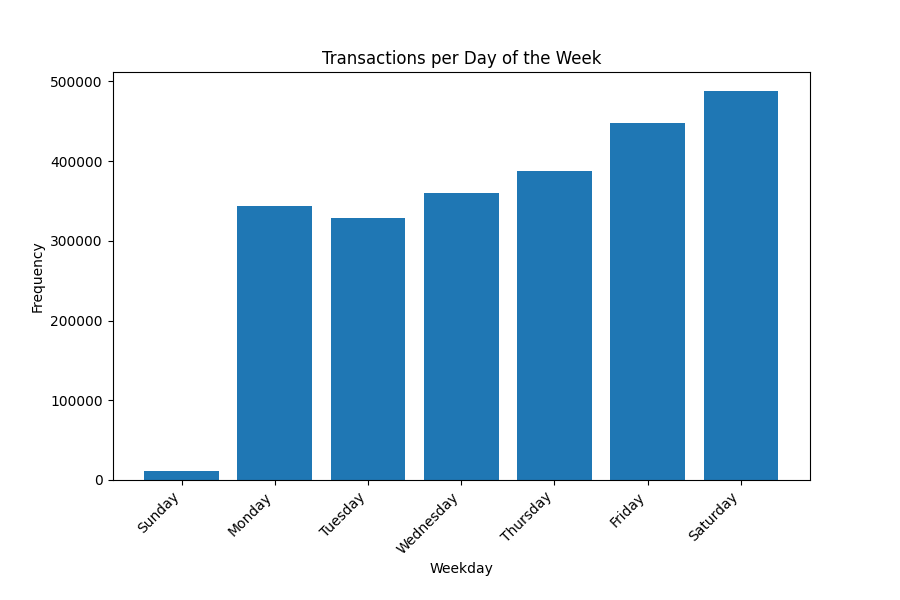

In [34]:
%matplotlib notebook

# Data
Xplot = df_trans_day['weekday'].astype('int32')
yplot = df_trans_day['transactions']

# Bar Blot
fig, ax = plt.subplots(figsize=(9, 6))
fig.autofmt_xdate()
plt.xlabel("Weekday")
plt.ylabel("Frequency")
plt.bar(Xplot, yplot)
plt.xticks(Xplot)
ax.set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], rotation = 45)
plt.title("Transactions per Day of the Week")
plt.savefig("visualizations/transactions_weekday.svg")
plt.show()

#### Transactions per Daytime

In [10]:
df_trans_hour = pd.io.sql.read_sql(""" 
SELECT EXTRACT(hour from transaktion.uhrzeit) AS daytime, COUNT(*) AS transactions
FROM transaktion
GROUP BY EXTRACT(hour from transaktion.uhrzeit)
ORDER BY EXTRACT(hour from transaktion.uhrzeit) ASC;
""", connection)

display(df_trans_hour)

,daytime,transactions
0,0.0,58
1,1.0,17
2,2.0,20
3,3.0,14
4,4.0,5
5,5.0,4
6,6.0,24
7,7.0,279
8,8.0,4149
9,9.0,219092


<IPython.core.display.Javascript object>


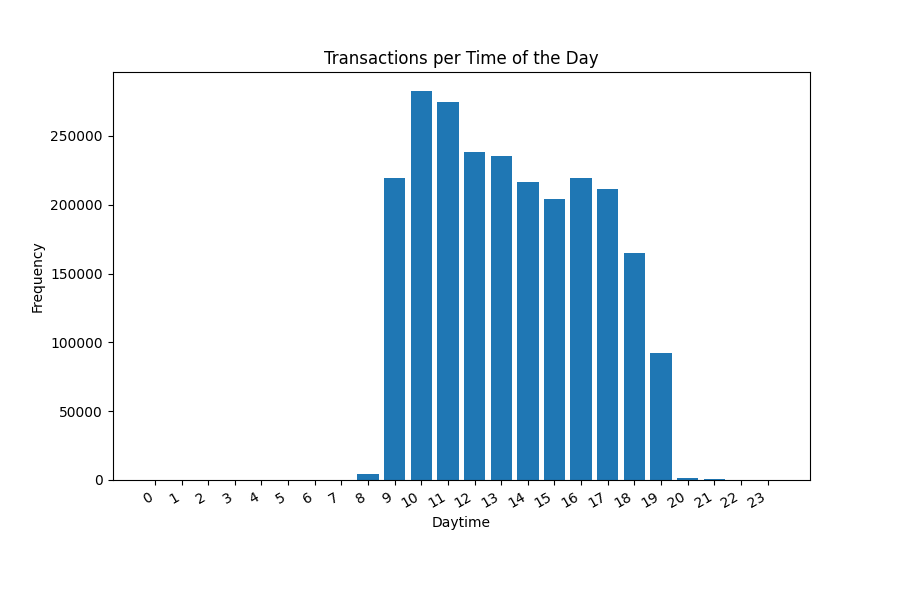

In [35]:
%matplotlib notebook

# Data
Xplot = df_trans_hour['daytime'].astype('int32')
yplot = df_trans_hour['transactions']

# Bar Blot
fig, ax = plt.subplots(figsize=(9, 6))
fig.autofmt_xdate()
plt.xlabel("Daytime")
plt.ylabel("Frequency")
plt.bar(Xplot, yplot)
plt.xticks(Xplot)
plt.title("Transactions per Time of the Day")
plt.savefig("visualizations/transactions_daytime.svg")
plt.show()

#### Development of Daily Transactions over time

In [12]:
df_transactions_timeseries = pd.io.sql.read_sql(""" 
SELECT EXTRACT(year from transaktion.datum) AS year, EXTRACT(month from transaktion.datum) AS month, COUNT(*) AS transactions
FROM transaktion
GROUP BY EXTRACT(year from transaktion.datum), EXTRACT(month from transaktion.datum)
ORDER BY EXTRACT(year from transaktion.datum) ASC, EXTRACT(month from transaktion.datum) ASC;
""", connection)


display(df_transactions_timeseries)

,year,month,transactions
0,2004.0,1.0,14220
1,2004.0,2.0,13517
2,2004.0,3.0,14550
3,2004.0,4.0,13631
4,2004.0,5.0,12033
...,...,...,...
211,2021.0,8.0,7603
212,2021.0,9.0,8457
213,2021.0,10.0,9644
214,2021.0,11.0,9790


<IPython.core.display.Javascript object>


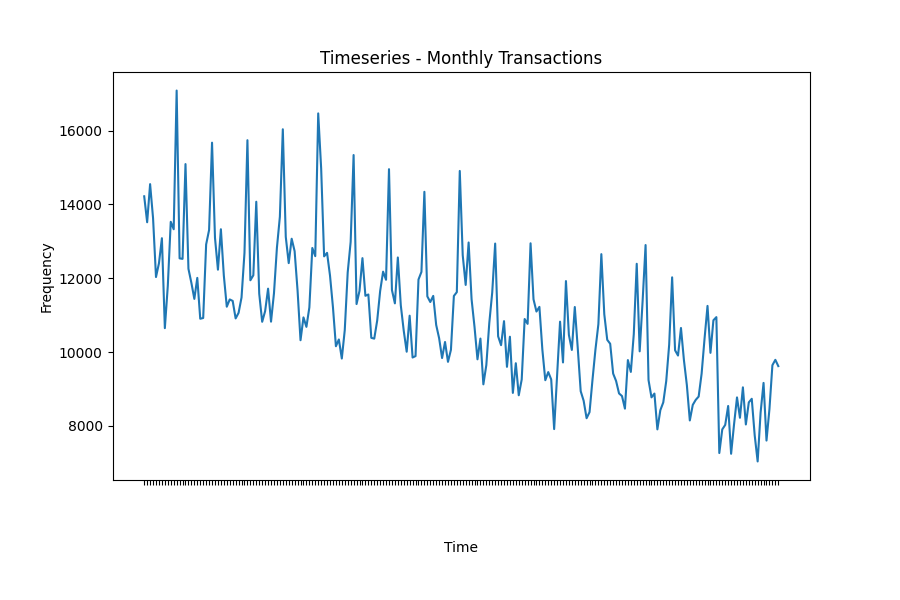

In [36]:
%matplotlib notebook

# Data
df_transactions_timeseries['year'] = df_transactions_timeseries['year'].astype('int32')
df_transactions_timeseries['month'] = df_transactions_timeseries['month'].astype('int32')
df_transactions_timeseries['month_year'] = df_transactions_timeseries.apply(lambda x: f"{x.month} - {x.year}", axis=1)

Xplot = df_transactions_timeseries['month_year']
yplot = df_transactions_timeseries['transactions']

# Line Plot
fig, ax = plt.subplots(figsize=(9, 6))
fig.autofmt_xdate()
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.plot(Xplot, yplot)
plt.xticks(color='w')
plt.title("Timeseries - Monthly Transactions")
plt.savefig("visualizations/transactions_timeseries.svg")
plt.show()

In [14]:

df_transactions_pivot = pd.pivot_table(df_transactions_timeseries, values="transactions",
                                index=["year"],
                                columns=["month"],
                                fill_value=0,
                                aggfunc=np.sum,
                                margins=True)


df_transactions_pivot.to_pickle('data/views/transaction_pivot.pkl')
display(df_transactions_pivot)

month,1,2,3,4,5,6,7,8,9,10,11,12,All
year,,,,,,,,,,,,,
2004,14220,13517,14550,13631,12033,12405,13085,10648,11794,13530,13327,17085,159825
2005,12539,12525,15093,12256,11873,11441,12010,10903,10923,12916,13307,15673,151459
2006,13096,12232,13328,12072,11229,11426,11386,10912,11063,11479,12688,15740,146651
2007,11945,12080,14073,11582,10820,11108,11718,10824,11593,12828,13666,16036,148273
2008,13121,12410,13071,12734,11667,10321,10940,10683,11211,12821,12598,16466,148043
2009,14975,12593,12688,12073,11213,10158,10342,9825,10593,12159,12984,15338,144941
2010,11301,11657,12545,11525,11560,10386,10364,10855,11653,12179,11958,14955,140938
2011,11680,11320,12563,11268,10579,10010,10986,9853,9891,11965,12172,14342,136629
2012,11509,11356,11522,10735,10375,9839,10273,9735,10061,11520,11624,14907,133456


<IPython.core.display.Javascript object>


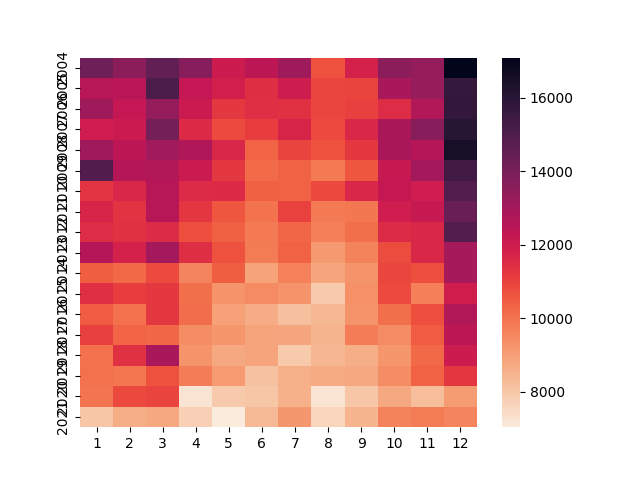

In [15]:
%matplotlib notebook

# Data
df_transactions_heatmap = df_transactions_pivot.drop('All', axis=1)
df_transactions_heatmap.drop('All', axis=0, inplace=True)

# Heatmap
ax = sns.heatmap(df_transactions_heatmap, cmap='rocket_r')
plt.xlabel("Month")
plt.ylabel("Year")
plt.title("Heatmap - Monthly Transactions")
plt.savefig("visualizations/transactions_heatmap.svg")
plt.show()

### Drugs

#### Top 10 Drugs

In [16]:
df_drug_alltime = pd.io.sql.read_sql(""" 
SELECT arzneimittel.pzn, arzneimittel.bezeichnung, arzneimittel.herkue, SUM(transaktion.anzahl) AS sales
FROM transaktion INNER JOIN arzneimittel ON transaktion.pzn = arzneimittel.pzn
WHERE arzneimittel.bezeichnung!='ARTIKEL' AND arzneimittel.bezeichnung!='REZEPTUR'
GROUP BY arzneimittel.pzn
ORDER BY sales DESC
LIMIT 10;
""", connection)


display(df_drug_alltime)

,pzn,bezeichnung,herkue,sales
0,999831,NASENSPRAY-ratiopharm Erwachsene kons.frei,RATIO,22839
1,1126111,PARACETAMOL-ratiopharm 500 mg Tabletten,RATIO,21875
2,179737,IBUBETA 400 akut Filmtabletten,BETAP,21602
3,8752455,SALMIAKPASTILLEN,APOTH,12797
4,571748,GRIPPOSTAD C Hartkapseln,STADA,11126
5,4507581,IMIDIN N Nasenspray,ARIST,10546
6,1809034,NEURANIDAL N Tabletten,STADA,9747
7,266040,IBU-RATIOPHARM 400 mg akut Schmerztbl.Filmtabl.,RATIO,9190
8,999854,NASENSPRAY-ratiopharm Kinder kons.frei,RATIO,9179
9,514644,IBEROGAST flÃ¼ssig,BAYER,9158


#### Top 10 Prescription Drugs

In [17]:
df_prescripton_drug_alltime = pd.io.sql.read_sql(""" 
SELECT arzneimittel.pzn, arzneimittel.bezeichnung, arzneimittel.herkue, SUM(transaktion.anzahl) AS sales
FROM transaktion INNER JOIN arzneimittel ON transaktion.pzn = arzneimittel.pzn
WHERE arzneimittel.bezeichnung!='ARTIKEL' AND arzneimittel.bezeichnung!='REZEPTUR' AND arzneimittel.rezeptflichtig = TRUE
GROUP BY arzneimittel.pzn
ORDER BY sales DESC
LIMIT 10;
""", connection)

display(df_prescripton_drug_alltime)

,pzn,bezeichnung,herkue,sales
0,1983648,RAMILICH 5 mg Tabletten,ZENTI,4549
1,762655,RAMIPRIL HEXAL comp. 5 mg/25 mg Tabletten,HEXAL,3858
2,6313390,IBUFLAM 600 mg Lichtenstein Filmtabletten,ZENTI,3190
3,850477,METOHEXAL Succ 95 mg Retardtabletten,HEXAL,2909
4,6575339,"MAXIM 0,03 mg/2 mg Ã¼berzogene Tabletten",JENAP,2832
5,6313409,IBUFLAM 600 mg Lichtenstein Filmtabletten,ZENTI,2790
6,2532770,L-THYROXIN 100 Henning Tabletten,SANOF,2740
7,8454491,AMLODIPIN besilat Dexcel 5 mg Tabletten,DEXCE,2738
8,1798000,NOVAMINSULFON Lichtenst.500 mg Filmtabletten,ZENTI,2695
9,769456,"VALETTE 0,03 mg/2,0 mg Ã¼berzogene Tabletten",JENAP,2644


#### Most Popular Drug Categories

In [18]:
df_drug_category_alltime = pd.io.sql.read_sql("""
SELECT jointable1.warengruppenbezeichnung_1, SUM(transaktion.anzahl) as sales
FROM transaktion INNER JOIN (arzneimittel INNER JOIN warengruppe ON arzneimittel.warengruppe = warengruppe.warengruppe) AS jointable1 ON transaktion.pzn = jointable1.pzn 
GROUP BY jointable1.warengruppenbezeichnung_1
ORDER BY SUM(transaktion.anzahl) DESC
LIMIT 10;""", connection)

display(df_drug_category_alltime)

,warengruppenbezeichnung_1,sales
0,Analgetika,159352
1,Husten- und ErkÃ¤ltungsmittel,135776
2,Rhinologika,133924
3,Antiphlogistika und Antirheumatika,120395
4,Medizinische KÃ¶rperpflegeartikel,95360
5,SÃ¼ÃŸwaren,87353
6,Verbandstoffe,68397
7,Mittel mit Wirkung auf das Renin-Angiotensin-S...,64905
8,Mittel bei SÃ¤ure bedingten Erkrankungen,57479
9,Ophthalmika,47966


####  Top 10 Drugs per Year

In [19]:
df_drug_alltime = pd.io.sql.read_sql(""" 
SELECT EXTRACT(year from transaktion.datum) AS year, arzneimittel.pzn, arzneimittel.bezeichnung, arzneimittel.herkue, SUM(transaktion.anzahl) AS sales
FROM transaktion INNER JOIN arzneimittel ON transaktion.pzn = arzneimittel.pzn
WHERE arzneimittel.bezeichnung!='ARTIKEL' AND arzneimittel.bezeichnung!='REZEPTUR'
GROUP BY EXTRACT(year from transaktion.datum), arzneimittel.pzn
ORDER BY EXTRACT(year from transaktion.datum) ASC, sales DESC;
""", connection)

df_drug_alltime['year'] = df_drug_alltime['year'].astype('int32')
df_drug_alltime.set_index(['year', 'pzn'], inplace=True)
df_drug_alltime = df_drug_alltime.groupby(level=0).head(10)

In [20]:
for year in df_drug_alltime.index.levels[0]:
    print(f"{year}:")
    display(df_drug_alltime.loc[year])
    print("\n")

2004:


,bezeichnung,herkue,sales
pzn,,,
1809034,NEURANIDAL N Tabletten,STADA,1258
4507581,IMIDIN N Nasenspray,ARIST,1039
2653278,TITRALGAN Tabletten gegen Schmerzen,BERLI,981
78597,ASPIRIN 0.5,BAYSE,933
1854201,SALBEI BONBONS mit Honig und Vitamin C,BENED,838
6197481,ACC akut 600 Brausetabletten,HEXAL,793
8752455,SALMIAKPASTILLEN,APOTH,754
1580241,BEPANTHEN Wund- und Heilsalbe,BAYER,710
1406632,ASPIRIN plus C Brausetabletten,BAYER,687




2005:


,bezeichnung,herkue,sales
pzn,,,
1809034,NEURANIDAL N Tabletten,STADA,1047
1854201,SALBEI BONBONS mit Honig und Vitamin C,BENED,1002
4507581,IMIDIN N Nasenspray,ARIST,983
826616,NEO-ANGIN Halstabletten zuckerfrei,KLOST,831
78597,ASPIRIN 0.5,BAYSE,792
8752455,SALMIAKPASTILLEN,APOTH,762
2653278,TITRALGAN Tabletten gegen Schmerzen,BERLI,724
6197481,ACC akut 600 Brausetabletten,HEXAL,684
743422,MUCOSOLVAN Saft 30 mg/5 ml,SANOF,669




2006:


,bezeichnung,herkue,sales
pzn,,,
4473250,"GOTA-POR Wundpflaster 5x7,2 cm steril",GOTHA,1048
1809034,NEURANIDAL N Tabletten,STADA,962
4507581,IMIDIN N Nasenspray,ARIST,959
78597,ASPIRIN 0.5,BAYSE,890
826616,NEO-ANGIN Halstabletten zuckerfrei,KLOST,792
999831,NASENSPRAY-ratiopharm Erwachsene kons.frei,RATIO,734
179737,IBUBETA 400 akut Filmtabletten,BETAP,727
743422,MUCOSOLVAN Saft 30 mg/5 ml,SANOF,719
2724914,BLOOMFIELD SALBEI,OTCSH,679




2007:


,bezeichnung,herkue,sales
pzn,,,
999831,NASENSPRAY-ratiopharm Erwachsene kons.frei,RATIO,1298
1809034,NEURANIDAL N Tabletten,STADA,961
4507581,IMIDIN N Nasenspray,ARIST,929
2013219,IBU 400 akut-1A Pharma Filmtabletten,1APHA,926
826616,NEO-ANGIN Halstabletten zuckerfrei,KLOST,875
78597,ASPIRIN 0.5,BAYSE,779
4473250,"GOTA-POR Wundpflaster 5x7,2 cm steril",GOTHA,751
2724914,BLOOMFIELD SALBEI,OTCSH,734
6197481,ACC akut 600 Brausetabletten,HEXAL,690




2008:


,bezeichnung,herkue,sales
pzn,,,
999831,NASENSPRAY-ratiopharm Erwachsene kons.frei,RATIO,1408
571748,GRIPPOSTAD C Hartkapseln,STADA,1093
4473250,"GOTA-POR Wundpflaster 5x7,2 cm steril",GOTHA,875
8752455,SALMIAKPASTILLEN,APOTH,866
826616,NEO-ANGIN Halstabletten zuckerfrei,KLOST,842
1809034,NEURANIDAL N Tabletten,STADA,812
179737,IBUBETA 400 akut Filmtabletten,BETAP,789
4507581,IMIDIN N Nasenspray,ARIST,767
762655,RAMIPRIL HEXAL comp. 5 mg/25 mg Tabletten,HEXAL,699




2009:


,bezeichnung,herkue,sales
pzn,,,
1126111,PARACETAMOL-ratiopharm 500 mg Tabletten,RATIO,1752
179737,IBUBETA 400 akut Filmtabletten,BETAP,1501
8752455,SALMIAKPASTILLEN,APOTH,1342
571748,GRIPPOSTAD C Hartkapseln,STADA,1276
999831,NASENSPRAY-ratiopharm Erwachsene kons.frei,RATIO,1271
3509218,PAGASLING STER PFLAUM GR3,HARTM,870
7135424,REMLOFECT Neu Halspastillen,ABANT,846
4473250,"GOTA-POR Wundpflaster 5x7,2 cm steril",GOTHA,747
705309,NASIC Nasenspray,KLOST,704




2010:


,bezeichnung,herkue,sales
pzn,,,
1126111,PARACETAMOL-ratiopharm 500 mg Tabletten,RATIO,2609
179737,IBUBETA 400 akut Filmtabletten,BETAP,1543
999831,NASENSPRAY-ratiopharm Erwachsene kons.frei,RATIO,1231
571748,GRIPPOSTAD C Hartkapseln,STADA,1130
3509218,PAGASLING STER PFLAUM GR3,HARTM,1010
4473250,"GOTA-POR Wundpflaster 5x7,2 cm steril",GOTHA,999
7135424,REMLOFECT Neu Halspastillen,ABANT,953
8752455,SALMIAKPASTILLEN,APOTH,858
826616,NEO-ANGIN Halstabletten zuckerfrei,KLOST,772




2011:


,bezeichnung,herkue,sales
pzn,,,
1126111,PARACETAMOL-ratiopharm 500 mg Tabletten,RATIO,2383
179737,IBUBETA 400 akut Filmtabletten,BETAP,1499
999831,NASENSPRAY-ratiopharm Erwachsene kons.frei,RATIO,1244
571748,GRIPPOSTAD C Hartkapseln,STADA,1021
3509218,PAGASLING STER PFLAUM GR3,HARTM,965
8752455,SALMIAKPASTILLEN,APOTH,743
826616,NEO-ANGIN Halstabletten zuckerfrei,KLOST,623
4473250,"GOTA-POR Wundpflaster 5x7,2 cm steril",GOTHA,617
458503,VOLTAREN Schmerzgel,GSKOT,614




2012:


,bezeichnung,herkue,sales
pzn,,,
1126111,PARACETAMOL-ratiopharm 500 mg Tabletten,RATIO,1892
179737,IBUBETA 400 akut Filmtabletten,BETAP,1480
999831,NASENSPRAY-ratiopharm Erwachsene kons.frei,RATIO,1265
571748,GRIPPOSTAD C Hartkapseln,STADA,989
3509218,PAGASLING STER PFLAUM GR3,HARTM,935
4507581,IMIDIN N Nasenspray,ARIST,712
458503,VOLTAREN Schmerzgel,GSKOT,638
2340421,"OLYNTH 0,1% fÃ¼r Erwachsene Nasendosierspray",JOHNS,625
8752455,SALMIAKPASTILLEN,APOTH,608




2013:


,bezeichnung,herkue,sales
pzn,,,
1126111,PARACETAMOL-ratiopharm 500 mg Tabletten,RATIO,2026
179737,IBUBETA 400 akut Filmtabletten,BETAP,1834
999831,NASENSPRAY-ratiopharm Erwachsene kons.frei,RATIO,1283
571748,GRIPPOSTAD C Hartkapseln,STADA,1027
3509218,PAGASLING STER PFLAUM GR3,HARTM,834
9999063,HILFSMITTEL MIETE O PZN,None,763
3929274,"NASENSPRAY AL 0,1%",ALIUD,678
8752455,SALMIAKPASTILLEN,APOTH,652
458503,VOLTAREN Schmerzgel,GSKOT,637




2014:


,bezeichnung,herkue,sales
pzn,,,
1126111,PARACETAMOL-ratiopharm 500 mg Tabletten,RATIO,1786
179737,IBUBETA 400 akut Filmtabletten,BETAP,1772
999831,NASENSPRAY-ratiopharm Erwachsene kons.frei,RATIO,1368
3509218,PAGASLING STER PFLAUM GR3,HARTM,820
8752455,SALMIAKPASTILLEN,APOTH,745
514644,IBEROGAST flÃ¼ssig,BAYER,684
3929274,"NASENSPRAY AL 0,1%",ALIUD,652
571748,GRIPPOSTAD C Hartkapseln,STADA,638
705309,NASIC Nasenspray,KLOST,501




2015:


,bezeichnung,herkue,sales
pzn,,,
179737,IBUBETA 400 akut Filmtabletten,BETAP,1852
1126111,PARACETAMOL-ratiopharm 500 mg Tabletten,RATIO,1629
999831,NASENSPRAY-ratiopharm Erwachsene kons.frei,RATIO,1605
571748,GRIPPOSTAD C Hartkapseln,STADA,786
8752455,SALMIAKPASTILLEN,APOTH,739
514644,IBEROGAST flÃ¼ssig,BAYER,651
3509218,PAGASLING STER PFLAUM GR3,HARTM,628
3929274,"NASENSPRAY AL 0,1%",ALIUD,597
999854,NASENSPRAY-ratiopharm Kinder kons.frei,RATIO,577




2016:


,bezeichnung,herkue,sales
pzn,,,
179737,IBUBETA 400 akut Filmtabletten,BETAP,1808
999831,NASENSPRAY-ratiopharm Erwachsene kons.frei,RATIO,1713
1126111,PARACETAMOL-ratiopharm 500 mg Tabletten,RATIO,1521
8752455,SALMIAKPASTILLEN,APOTH,878
571748,GRIPPOSTAD C Hartkapseln,STADA,765
514644,IBEROGAST flÃ¼ssig,BAYER,694
3929274,"NASENSPRAY AL 0,1%",ALIUD,629
999854,NASENSPRAY-ratiopharm Kinder kons.frei,RATIO,622
5566232,BRONCHIPRET Saft TE,BIONO,608




2017:


,bezeichnung,herkue,sales
pzn,,,
999831,NASENSPRAY-ratiopharm Erwachsene kons.frei,RATIO,1874
179737,IBUBETA 400 akut Filmtabletten,BETAP,1649
1126111,PARACETAMOL-ratiopharm 500 mg Tabletten,RATIO,1450
514644,IBEROGAST flÃ¼ssig,BAYER,817
571748,GRIPPOSTAD C Hartkapseln,STADA,691
3929274,"NASENSPRAY AL 0,1%",ALIUD,636
266040,IBU-RATIOPHARM 400 mg akut Schmerztbl.Filmtabl.,RATIO,631
999854,NASENSPRAY-ratiopharm Kinder kons.frei,RATIO,597
8752455,SALMIAKPASTILLEN,APOTH,583




2018:


,bezeichnung,herkue,sales
pzn,,,
999831,NASENSPRAY-ratiopharm Erwachsene kons.frei,RATIO,1977
179737,IBUBETA 400 akut Filmtabletten,BETAP,1511
1126111,PARACETAMOL-ratiopharm 500 mg Tabletten,RATIO,1240
8752455,SALMIAKPASTILLEN,APOTH,827
266040,IBU-RATIOPHARM 400 mg akut Schmerztbl.Filmtabl.,RATIO,825
514644,IBEROGAST flÃ¼ssig,BAYER,711
3929274,"NASENSPRAY AL 0,1%",ALIUD,680
999854,NASENSPRAY-ratiopharm Kinder kons.frei,RATIO,624
571748,GRIPPOSTAD C Hartkapseln,STADA,589




2019:


,bezeichnung,herkue,sales
pzn,,,
999831,NASENSPRAY-ratiopharm Erwachsene kons.frei,RATIO,2015
266040,IBU-RATIOPHARM 400 mg akut Schmerztbl.Filmtabl.,RATIO,1334
1126111,PARACETAMOL-ratiopharm 500 mg Tabletten,RATIO,1245
179737,IBUBETA 400 akut Filmtabletten,BETAP,845
514644,IBEROGAST flÃ¼ssig,BAYER,712
12521543,NASENDUO Nasenspray,RATIO,701
3929274,"NASENSPRAY AL 0,1%",ALIUD,687
999854,NASENSPRAY-ratiopharm Kinder kons.frei,RATIO,628
571748,GRIPPOSTAD C Hartkapseln,STADA,506




2020:


,bezeichnung,herkue,sales
pzn,,,
9999034,VERBANDMITTEL OHNE PZN,None,3904
80000451,COVID MASKEN FFP 2,None,2480
999831,NASENSPRAY-ratiopharm Erwachsene kons.frei,RATIO,1503
1126111,PARACETAMOL-ratiopharm 500 mg Tabletten,RATIO,1413
179737,IBUBETA 400 akut Filmtabletten,BETAP,1069
266040,IBU-RATIOPHARM 400 mg akut Schmerztbl.Filmtabl.,RATIO,879
999854,NASENSPRAY-ratiopharm Kinder kons.frei,RATIO,665
3929274,"NASENSPRAY AL 0,1%",ALIUD,585
12521543,NASENDUO Nasenspray,RATIO,582




2021:


,bezeichnung,herkue,sales
pzn,,,
80000480,COVID MASKEN FFP 2,None,3915
80000451,COVID MASKEN FFP 2,None,3080
80000534,COVID19 ANTIGENSELBSTTEST,MAKEG,2198
999831,NASENSPRAY-ratiopharm Erwachsene kons.frei,RATIO,1050
179737,IBUBETA 400 akut Filmtabletten,BETAP,977
1126111,PARACETAMOL-ratiopharm 500 mg Tabletten,RATIO,928
266040,IBU-RATIOPHARM 400 mg akut Schmerztbl.Filmtabl.,RATIO,663
12521543,NASENDUO Nasenspray,RATIO,632
9999034,VERBANDMITTEL OHNE PZN,None,617


### Inventory

#### Distribution among Drugs

In [37]:
df_inventory_drugs = pd.io.sql.read_sql(""" 
SELECT lager.lagerort, lager.lagerortname, COUNT(*) as drug_count
FROM arzneimittel INNER JOIN lager ON arzneimittel.lagerort = lager.lagerort
GROUP BY lager.lagerort
""", connection)

display(df_inventory_drugs)

,lagerort,lagerortname,drug_count
0,FC,Freiwahl Sichtwahl,2
1,B,None,196
2,FG,Freiwahl Generalalphabet,3
3,N,NovitÃ¤t,1680
4,XF,Nicht auf Lager Freiwahl,4
5,CF,Sichtwahl Freiwahl,9
6,VN,Verbandstoff NovitÃ¤t,1
7,NF,NovitÃ¤t Freiwahl,1
8,M,None,6
9,XVG,Nicht auf Lager Verbandstoff Generalalphabet,1


In [22]:
drugs_amount = df_inventory_drugs['drug_count'].sum()
not_in_stock_amount = df_inventory_drugs.loc[df_inventory_drugs['lagerort'] == "X"]

print(f"Share of Drugs that are in Stock: {drugs_amount - not_in_stock_amount['drug_count'].values[0]} / {drugs_amount}")

Share of Drugs that are in Stock: 10145 / 46835


<IPython.core.display.Javascript object>


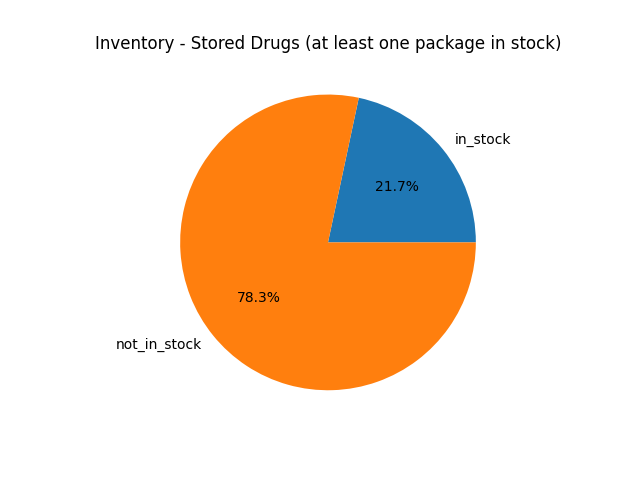

In [38]:
%matplotlib notebook

# Data
Xplot = [(drugs_amount-not_in_stock_amount['drug_count'].values[0]), not_in_stock_amount['drug_count'].values[0]]
yplot = "in_stock", "not_in_stock"

# Line Plot

plt.pie(Xplot, explode=None, labels=yplot, autopct='%1.1f%%',)
plt.title("Inventory - Stored Drugs (at least one package in stock)")
plt.savefig("visualizations/inventory_drugs_pie.svg")
plt.show()

#### Distribution among Packages

In [24]:
df_inventory_packages = pd.io.sql.read_sql(""" 
SELECT arzneimittel.lagerort, SUM(transaktion.anzahl) as quantity
FROM arzneimittel INNER JOIN transaktion ON arzneimittel.pzn = transaktion.pzn
GROUP BY arzneimittel.lagerort
""", connection)

display(df_inventory_packages)

,lagerort,quantity
0,B,7855
1,BTM,321
2,C,446459
3,CF,2895
4,CG,59638
5,CGO,48
6,E,4
7,F,273600
8,FC,1907
9,FG,1324


In [25]:
df_inventory_none = pd.io.sql.read_sql(""" 
SELECT *
FROM arzneimittel INNER JOIN transaktion ON arzneimittel.pzn = transaktion.pzn
WHERE arzneimittel.lagerort IS NULL
LIMIT 1000
""", connection)

display(df_inventory_none)

,pzn,bezeichnung,herkue,darr,menge,warengruppe,me,rezeptflichtig,apothekenpflichtig,lagerort,id,auftrag,datum,uhrzeit,pzn,anzahl,retoure,verfalldaten,nachlieferungsmenge
0,743356,None,None,None,None,None,None,False,False,None,2,64925,2004-01-02,09:03:00,743356,1,False,None,0
1,3211128,HEDELIX HUSTEN BRAUSETABL,KREWE,BTA,10,None,aA,False,False,None,3,64925,2004-01-02,09:03:00,3211128,1,False,2004-10-01,0
2,6997885,CHLORHEXAMED Fluid,GSKOT,LOE,200,AA01AB03,ML,False,True,None,5,64930,2004-01-02,09:08:00,6997885,1,False,None,0
3,964005,None,None,None,None,None,None,False,False,None,6,64931,2004-01-02,09:13:00,964005,2,False,2004-07-01,0
4,1630743,None,None,None,None,None,None,False,False,None,7,64931,2004-01-02,09:13:00,1630743,1,False,2004-07-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2470514,CARVOMIN Verdauungstropfen,KLING,FLE,20,BB03F,ML,False,False,None,2464,66658,2004-01-07,18:16:00,2470514,1,False,None,0
996,4026999,THIOBITUM Salbe 20%,INFEC,SAL,25,AD05AA,G,False,True,None,2466,66659,2004-01-07,18:16:00,4026999,1,False,None,0
997,1692164,BIOLECTRA Zink Lutschtabletten,HERME,LUT,20,BB03D,ST,False,False,None,2469,66662,2004-01-07,18:21:00,1692164,1,False,2005-06-01,0
998,2245119,MICROLIFE Thermometer 10Sek.MT1951,WEPA,,1,BA04E,ST,False,False,None,2470,66663,2004-01-07,18:22:00,2245119,1,False,None,0


The share of packages without a storage location specified is relatively high. Since those drugs often miss the product name (bezeichnung) and product type (warengruppe), they cannot be assigned to a location belated. Hence, for the following exploration, transaction without a storage location shall be omitted.

In [26]:
df_inventory_packages.dropna(inplace=True)

In [27]:
package_quantity = df_inventory_packages['quantity'].sum()
not_in_stock_quantity = df_inventory_packages.loc[df_inventory_packages['lagerort'] == "X"]

print(f"Share of Packages that were in Stock: {package_quantity - not_in_stock_quantity['quantity'].values[0]} / {package_quantity}")

Share of Packages that were in Stock: 1476004 / 2034935


<IPython.core.display.Javascript object>


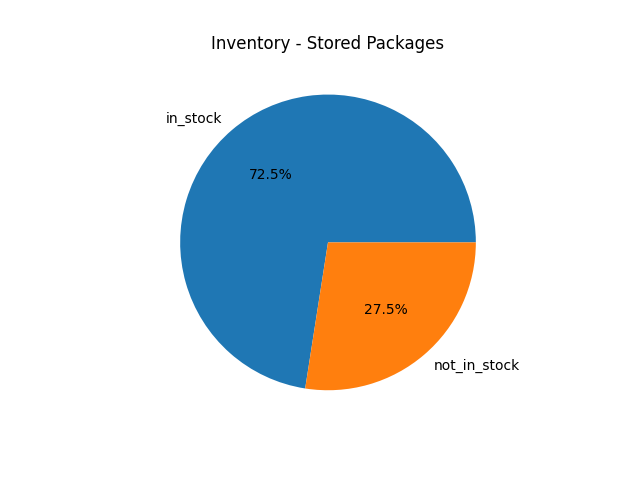

In [39]:
%matplotlib notebook

# Data
Xplot = [(package_quantity-not_in_stock_quantity['quantity'].values[0]), not_in_stock_quantity['quantity'].values[0]]
yplot = "in_stock", "not_in_stock"

# Line Plot

plt.pie(Xplot, explode=None, labels=yplot, autopct='%1.1f%%',)
plt.title("Inventory - Stored Packages")
plt.savefig("visualizations/inventory_packages_pie.svg")
plt.show()

**A quick note:** The above exploration holds only under the assumption that sold packages are immediately restocked as well as stored in sufficient quantity to begin with. If for example, several customers request a single drug within a short time period, the stored quantity might not be sufficient to satisfy the whole demand. Hence, the amount of not available packages should account as 'not_in_stock' even though under normal circumstances it would be 'in_stock'. Hence, the amount of 'in_stock' packages is upward-biased.

<IPython.core.display.Javascript object>


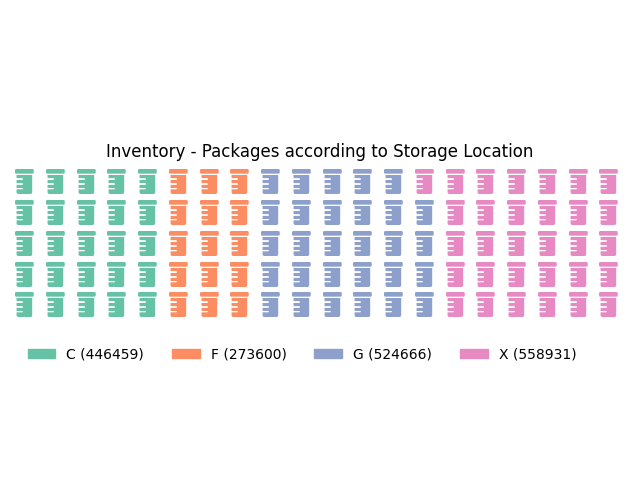

In [40]:
%matplotlib notebook

# Data
relevant_storage_location = ["C", "G", "F", "X"]
df_inventory_quantity = df_inventory_packages.loc[df_inventory_packages['lagerort'].isin(relevant_storage_location)]

Xplot = df_inventory_quantity['lagerort']
yplot = df_inventory_quantity['quantity']
data = dict(zip(Xplot, yplot))


fig = plt.figure(
    FigureClass=Waffle, 
    rows=5,
    columns=20,
    values=data,
    labels=["{0} ({1})".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    icons='prescription-bottle', icon_size=18
)


plt.title("Inventory - Packages according to Storage Location")
plt.savefig("visualizations/inventory_packages_waffle.svg")
plt.show()

C:\Users\Niklas\pharmacy_inventory\env\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<IPython.core.display.Javascript object>


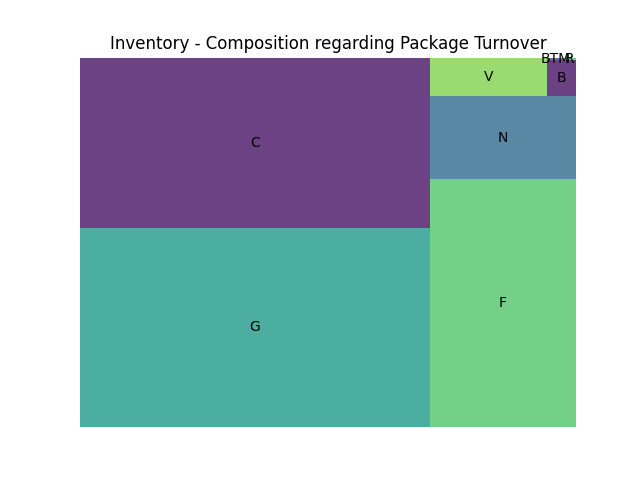

In [30]:
%matplotlib notebook

# Data
relevant_storage_location = ["B", "C", "G", "F", "N", "R", "V", "BTM", "K" "X"]
df_inventory_composition = df_inventory_packages.loc[df_inventory_packages['lagerort'].isin(relevant_storage_location)]

df_inventory_composition.sort_values('quantity', ascending=False, inplace=True)

Xplot = df_inventory_composition['lagerort']
yplot = df_inventory_composition['quantity']


squarify.plot(sizes=yplot, label=Xplot, alpha=.8 )
plt.axis('off')

plt.title("Inventory - Composition regarding Package Turnover")
plt.savefig("visualizations/inventory_packages_treemap.svg")
plt.show()

#### Subsequent delivery

Even though the storage location is in indicator whether a drug is in stock or not, as previous mentioned, it is also possible that the pharmacy is short on a drug that usually should be in stock. Luckily, for each transaction it is recorded, whether the packages were in stock or if they had been ordered from the wholesale. The information is stored in the subsequent delivery amount variable ('Nachlieferungsmenge').

In [31]:
df_subsequent_delivery_sum = pd.io.sql.read_sql(""" 
SELECT SUM(transaktion.nachlieferungsmenge)
FROM transaktion
WHERE transaktion.retoure = false
""", connection)


df_packages_sum = pd.io.sql.read_sql(""" 
SELECT SUM(transaktion.anzahl)
FROM transaktion
WHERE transaktion.retoure = false
""", connection)


print(f"Share of subsequent deliveries: {df_subsequent_delivery_sum['sum'].values[0]} / {df_packages_sum['sum'].values[0]}")

Share of subsequent deliveries: 64031 / 2585814
